# Trying CPD on HCQT representation

In [9]:
import numpy as np
import soundfile as sf
import musicntd.model.features as features
import nn_fac.ntf as NTF
import nn_fac.parafac2 as PARAFAC2

from musicntd.model.current_plot import *

#import librosa

In [2]:
# Song
song_path = "C:\\Users\\amarmore\\this_folder\\The Beatles - Come Together.wav" # TOMODIFY

# Load the song
the_signal, original_sampling_rate = sf.read(song_path)
print(the_signal.shape)
#the_signal = the_signal[:30 * original_sampling_rate,:]
sampling_rate = 44100
if original_sampling_rate != sampling_rate:
    the_signal = librosa.core.resample(np.asfortranarray(the_signal), original_sampling_rate, sampling_rate)

#annotation_path = "..\\additional files\\The Beatles - Come Together.lab"
#annotations = dm.get_segmentation_from_txt(annotation_path, "MIREX10")
#references_segments = np.array(annotations)[:,0:2]

(11349951, 2)


C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


Harmonic 0 -> sub harmonic


c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\model\current_plot.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(padded_spec.shape[1]), np.arange(padded_spec.shape[0]), padded_spec, cmap=cmap)


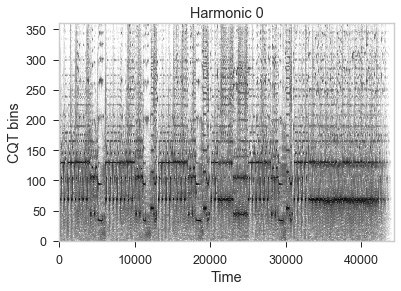

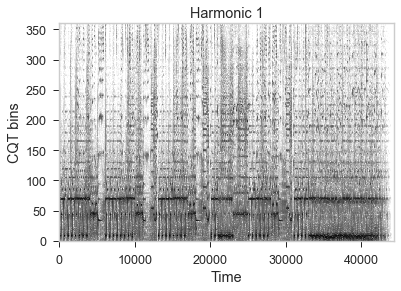

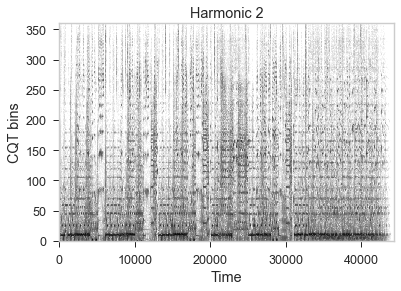

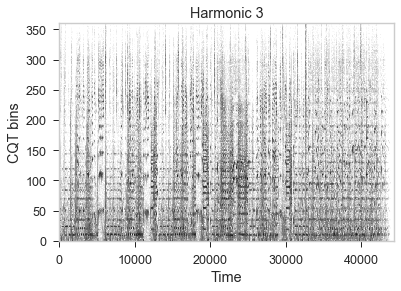

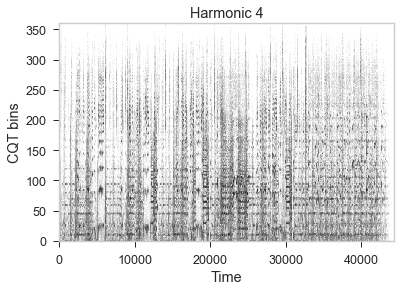

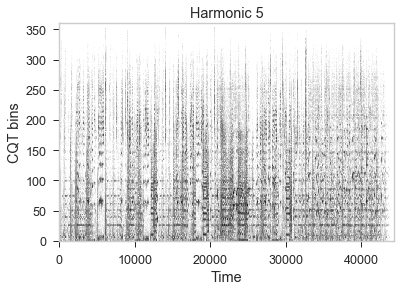

In [3]:
tensor_hcqt = features.get_spectrogram(the_signal, sampling_rate, "hcqt", hop_length =  "unused")
print("Harmonic 0 -> sub harmonic")
for i in range(6):
    plot_me_this_spectrogram(tensor_hcqt[:,:,i], x_axis = "Time", y_axis = "CQT bins", title = "Harmonic {}".format(i), invert_y_axis = False)

# Decompose the song
## CPD

In [4]:
ranks = 30
factors = NTF.ntf(tensor_hcqt, rank = ranks, init = "nndsvd", sparsity_coefficients = [], fixed_modes = [], normalize = [True, True, False],
           verbose=False, return_errors=False)

Irrelevant number of sparsity coefficient (different from the number of modes), they have been set to None.


c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\model\current_plot.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(padded_spec.shape[1]), np.arange(padded_spec.shape[0]), padded_spec, cmap=cmap)


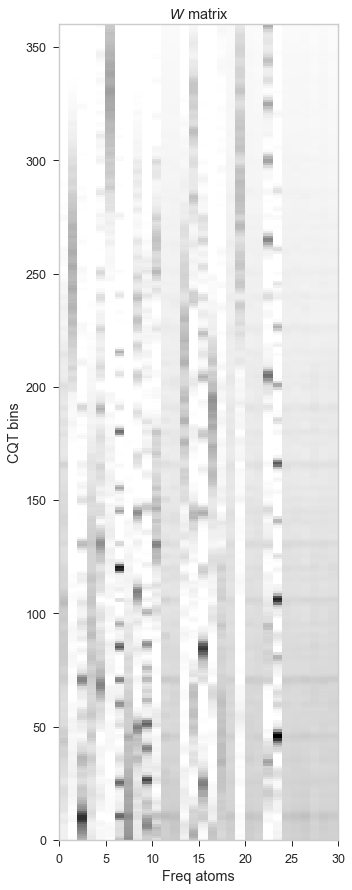

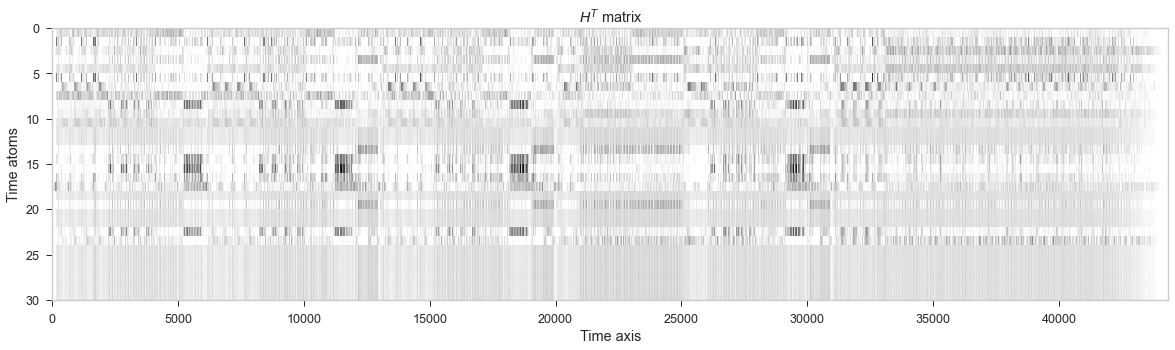

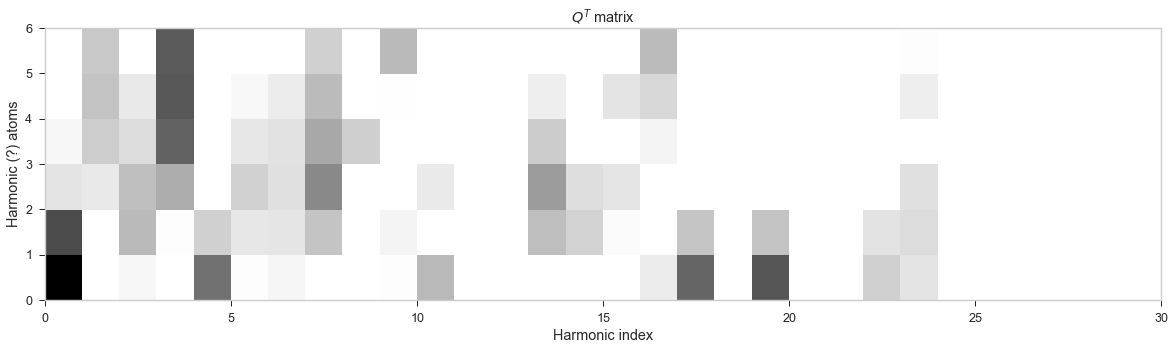

In [5]:
# Plotting the factors
plot_me_this_spectrogram(factors[0], invert_y_axis = False,figsize=(5,15), title = "$W$ matrix", x_axis = "Freq atoms", y_axis = "CQT bins")
plot_me_this_spectrogram(factors[1].T, figsize=(20,5), title = "$H^T$ matrix", x_axis = "Time axis", y_axis = "Time atoms")
plot_me_this_spectrogram(factors[2], invert_y_axis = False,figsize=(20,5), title = "$Q^T$ matrix", x_axis = "Harmonic index", y_axis = "Harmonic (?) atoms")

## PARAFAC2

C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


Harmonic 0 -> sub harmonic


c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\model\current_plot.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(padded_spec.shape[1]), np.arange(padded_spec.shape[0]), padded_spec, cmap=cmap)


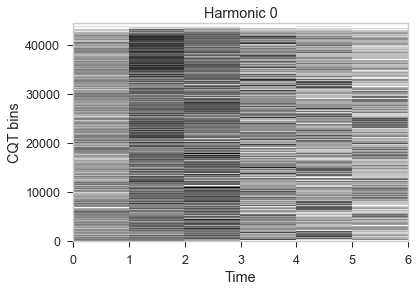

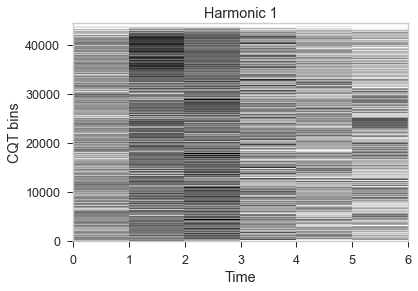

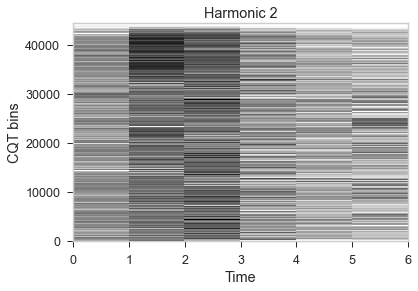

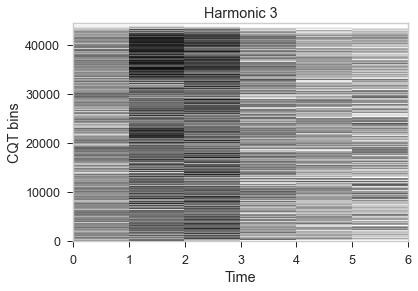

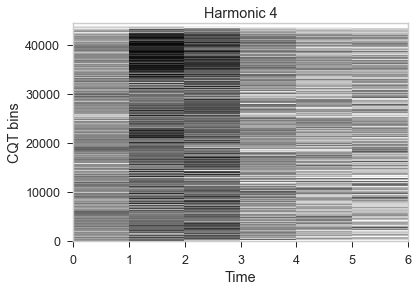

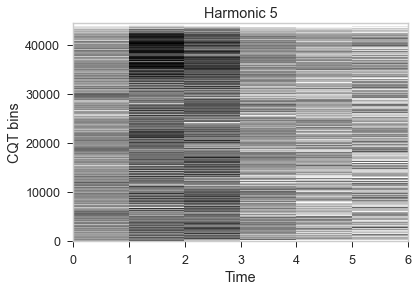

In [7]:
tensor_hcqt_bittner = features.compute_hcqt_bittner(np.asfortranarray(the_signal[:,0]), sampling_rate)
print("Harmonic 0 -> sub harmonic")
for i in range(6):
    plot_me_this_spectrogram(tensor_hcqt_bittner[i,:,:5000], x_axis = "Time", y_axis = "CQT bins", title = "Harmonic {}".format(i), invert_y_axis = False)

In [13]:
rank = 30
W_list, H, D_list = PARAFAC2.parafac_2(tensor_hcqt_bittner, rank = rank, init_with_P = False, init = "nndsvd", normalize = [True, True, False, True, True],
           verbose=True, return_errors=False)

reconstruction error=895216.9392811515
couple_error for channel 0 = 42.78082104558041
couple_error for channel 1 = 65.31430408667582
couple_error for channel 2 = 35.89970304315503
couple_error for channel 3 = 52.89857515870682
couple_error for channel 4 = 26.922164172602105
couple_error for channel 5 = 25.672325797720937
reconstruction error=649568.3437167857, variation=245648.59556436585.
couple_error for channel 0 = 49.256983970132744, variation=-6.476162924552334.
couple_error for channel 1 = 80.41925013865108, variation=-15.104946051975261.
couple_error for channel 2 = 40.372967211559036, variation=-4.4732641684040075.
couple_error for channel 3 = 69.24833065430481, variation=-16.34975549559799.
couple_error for channel 4 = 32.35165012908409, variation=-5.429485956481987.
couple_error for channel 5 = 29.36149215489814, variation=-3.6891663571772035.
reconstruction error=560618.237349051, variation=88950.10636773461.
couple_error for channel 0 = 49.020561219101175, variation=0.23642

reconstruction error=447095.1285562705, variation=1354.3876590844593.
couple_error for channel 0 = 43.65779225033981, variation=0.3406384471019095.
couple_error for channel 1 = 68.64046668441146, variation=0.9560533436814609.
couple_error for channel 2 = 38.16744852280826, variation=0.4736028175888407.
couple_error for channel 3 = 53.75363801338846, variation=0.985791441201485.
couple_error for channel 4 = 29.30729660490587, variation=0.40831579420258635.
couple_error for channel 5 = 27.57209072128255, variation=0.5750234058872081.
reconstruction error=445893.53338710265, variation=1201.5951691678492.
couple_error for channel 0 = 43.32406806064029, variation=0.33372418969951667.
couple_error for channel 1 = 67.71071317681192, variation=0.9297535075995427.
couple_error for channel 2 = 37.7468421095485, variation=0.4206064132597547.
couple_error for channel 3 = 52.82230755976613, variation=0.9313304536223299.
couple_error for channel 4 = 28.919160499621412, variation=0.3881361052844561.


reconstruction error=437180.87747647706, variation=297.1823629698483.
couple_error for channel 0 = 39.22787117112093, variation=0.24087923404216127.
couple_error for channel 1 = 57.40288727920575, variation=0.546326386254556.
couple_error for channel 2 = 32.233441477377454, variation=0.33077313418646526.
couple_error for channel 3 = 43.23402346705337, variation=0.46878260193048504.
couple_error for channel 4 = 24.17995252164588, variation=0.27619549944590105.
couple_error for channel 5 = 17.871576524745425, variation=0.39663475334288023.
reconstruction error=436959.53688361926, variation=221.3405928577995.
couple_error for channel 0 = 39.01305667551341, variation=0.21481449560751997.
couple_error for channel 1 = 56.85624005772677, variation=0.5466472214789775.
couple_error for channel 2 = 31.93416873712236, variation=0.29927274025509476.
couple_error for channel 3 = 42.7689217352118, variation=0.4651017318415711.
couple_error for channel 4 = 23.92705452947118, variation=0.2528979921746

reconstruction error=435157.0067305011, variation=92.00567146483809.
couple_error for channel 0 = 35.45388731262046, variation=0.2162812775839953.
couple_error for channel 1 = 49.75551600088212, variation=0.4246215540802538.
couple_error for channel 2 = 27.856407511964342, variation=0.2432741035737358.
couple_error for channel 3 = 36.879115806285796, variation=0.34607312368856213.
couple_error for channel 4 = 20.527741470134853, variation=0.19599731216300142.
couple_error for channel 5 = 14.882666682389535, variation=0.11772539958575479.
reconstruction error=435054.13342022337, variation=102.87331027770415.
couple_error for channel 0 = 35.24328335205729, variation=0.21060396056316932.
couple_error for channel 1 = 49.323338948933184, variation=0.4321770519489334.
couple_error for channel 2 = 27.60649619985821, variation=0.24991131210613204.
couple_error for channel 3 = 36.541900799680164, variation=0.3372150066056321.
couple_error for channel 4 = 20.312553052484702, variation=0.21518841

reconstruction error=434503.9922742253, variation=12.997891630860977.
couple_error for channel 0 = 32.060531350677415, variation=0.2151302422943573.
couple_error for channel 1 = 43.331512795318126, variation=0.3814068746540755.
couple_error for channel 2 = 24.083642156705995, variation=0.22324100887135856.
couple_error for channel 3 = 31.98987027562857, variation=0.28195999474672817.
couple_error for channel 4 = 17.571001056586294, variation=0.17107576940678726.
couple_error for channel 5 = 13.3229037101038, variation=0.0859152476889058.
reconstruction error=434502.7015862787, variation=1.2906879466027021.
couple_error for channel 0 = 31.84442097665539, variation=0.21611037402202626.
couple_error for channel 1 = 42.937572169678596, variation=0.39394062563953014.
couple_error for channel 2 = 23.859887821469872, variation=0.22375433523612287.
couple_error for channel 3 = 31.721345040724984, variation=0.26852523490358493.
couple_error for channel 4 = 17.384990814221627, variation=0.186010

reconstruction error=433228.50810623204, variation=133.3284608750837.
couple_error for channel 0 = 29.546037855286173, variation=0.1322977658752933.
couple_error for channel 1 = 38.88622888395483, variation=0.22707171505256696.
couple_error for channel 2 = 21.720182362897823, variation=0.10833421585331848.
couple_error for channel 3 = 29.083880675497042, variation=0.1347908977307739.
couple_error for channel 4 = 15.944007978845704, variation=0.06349605025726746.
couple_error for channel 5 = 12.73449485678796, variation=0.01320571594597375.
reconstruction error=433093.26675433724, variation=135.24135189480148.
couple_error for channel 0 = 29.41753510715804, variation=0.12850274812813112.
couple_error for channel 1 = 38.66646733760498, variation=0.2197615463498508.
couple_error for channel 2 = 21.615823890403938, variation=0.1043584724938853.
couple_error for channel 3 = 28.953193598260004, variation=0.1306870772370381.
couple_error for channel 4 = 15.883548309424041, variation=0.0604596

reconstruction error=431245.8878643056, variation=119.68542545248056.
couple_error for channel 0 = 27.7909376154787, variation=0.10920583236195114.
couple_error for channel 1 = 35.946585894401025, variation=0.17631410837670103.
couple_error for channel 2 = 20.4018662845014, variation=0.07962440986076302.
couple_error for channel 3 = 27.45052833812161, variation=0.09477127429763144.
couple_error for channel 4 = 15.201850779530465, variation=0.04405422774420842.
couple_error for channel 5 = 12.586779914952801, variation=0.004611896924215486.
reconstruction error=431129.8319138166, variation=116.05595048895339.
couple_error for channel 0 = 27.68374374679769, variation=0.1071938686810121.
couple_error for channel 1 = 35.77153598026307, variation=0.17504991413795778.
couple_error for channel 2 = 20.323189780832845, variation=0.07867650366855372.
couple_error for channel 3 = 27.35786010926143, variation=0.09266822886018034.
couple_error for channel 4 = 15.158756724463041, variation=0.0430940

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\model\current_plot.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(padded_spec.shape[1]), np.arange(padded_spec.shape[0]), padded_spec, cmap=cmap)


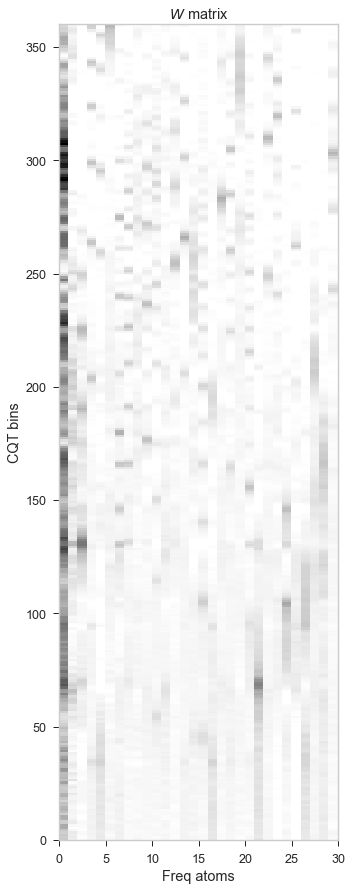

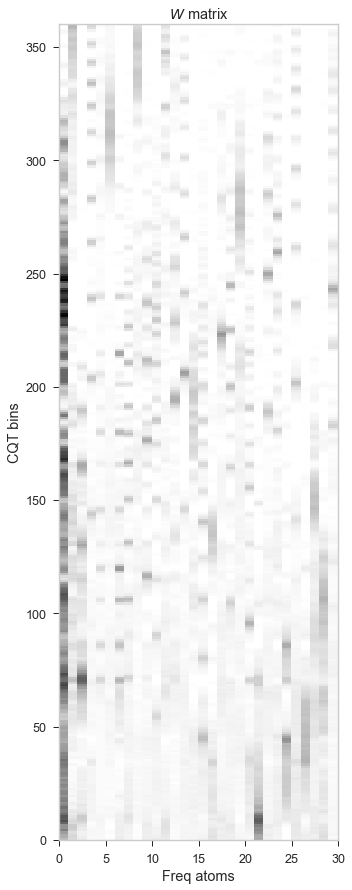

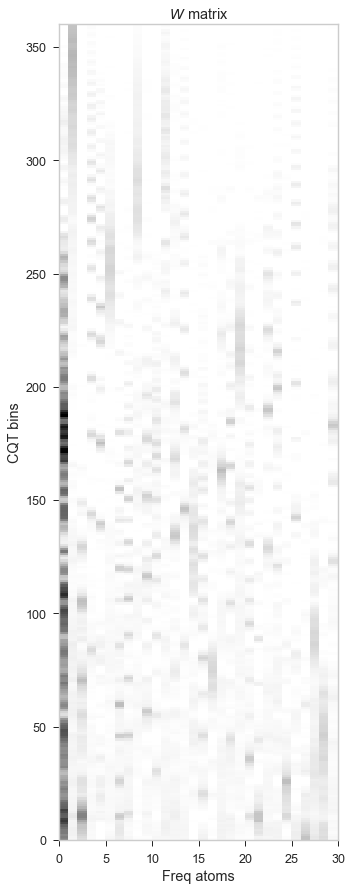

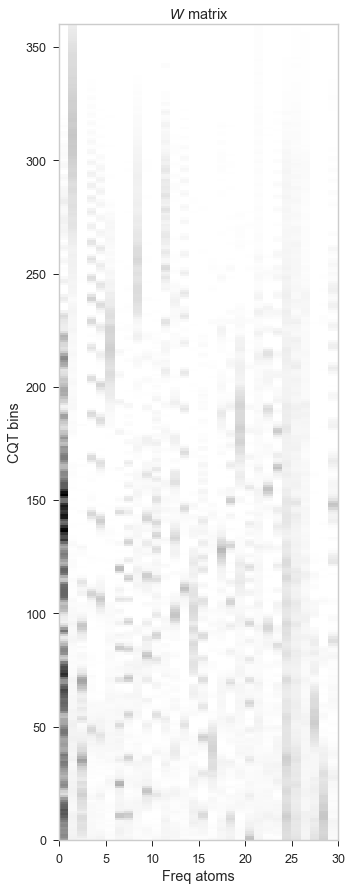

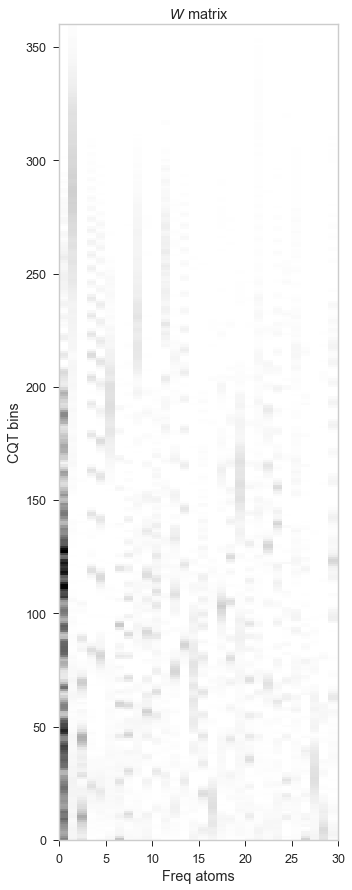

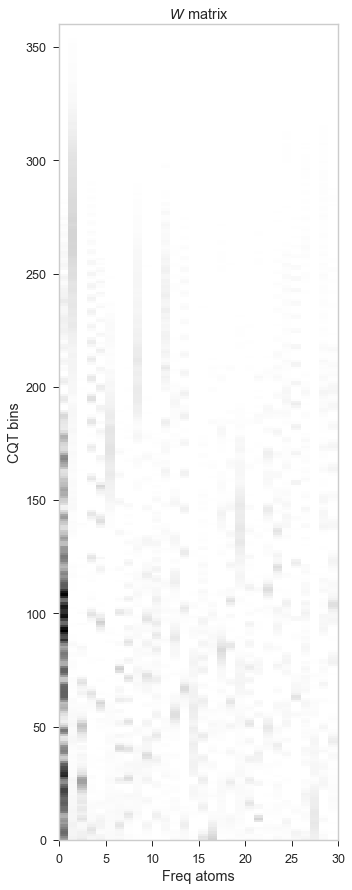

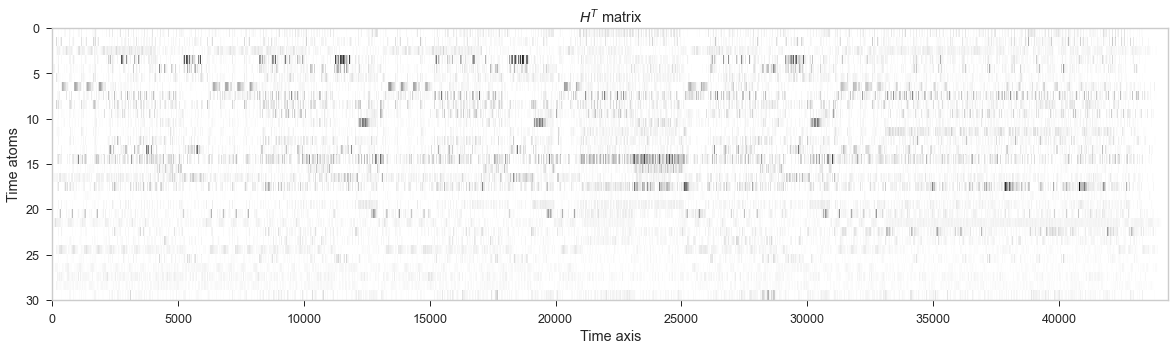

[[0.37304068 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.3884841  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.10396039 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.49510262 0.         0.
  0.         

In [14]:
# Plotting the factors
for i in range(len(W_list)):
    plot_me_this_spectrogram(W_list[i], invert_y_axis = False,figsize=(5,15), title = "$W$ matrix", x_axis = "Freq atoms", y_axis = "CQT bins")

plot_me_this_spectrogram(H, figsize=(20,5), title = "$H^T$ matrix", x_axis = "Time axis", y_axis = "Time atoms")
for i in range(len(D_list)):
    print(D_list[i])